**0. Importing Necessary Libraries**

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import R
andomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ImportError: cannot import name 'R' from 'sklearn.ensemble' (c:\Users\Linghesh\anaconda3\Lib\site-packages\sklearn\ensemble\__init__.py)

**1. Data Acquisition and Initial Setup**

In [ ]:
data = pd.read_csv(r"C:\Users\Linghesh\Desktop\Linghesh\CoLLege\Data Visualization Using Python\Mini Project\Network Intrusion Detection\Train_data.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
print(data.describe())

           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.4888

In [ ]:
print(data.isnull().sum().sum())

0


C:\Users\Linghesh\AppData\Local\Temp\ipykernel_6088\3705820762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')


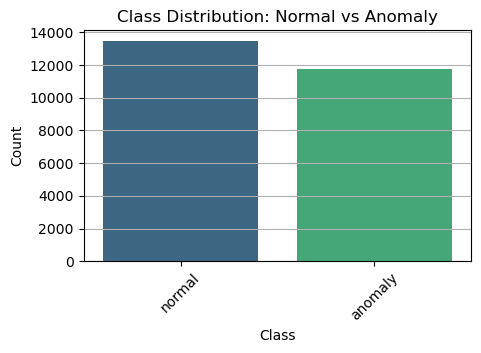

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='class', data=data, palette='viridis')
plt.title('Class Distribution: Normal vs Anomaly')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**2. Data Cleaning and Preprocessing**

In [ ]:
#HANDLING MISSING VALUES
print("Missing Values in Each Column:")
print(data.isnull().sum().sum())

Missing Values in Each Column:
0


In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
  print(f"Unique values in '{col}':")
  print(data[col].unique(), "\n")

Unique values in 'protocol_type':
['tcp' 'udp' 'icmp'] 

Unique values in 'service':
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001'] 

Unique values in 'flag':
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 



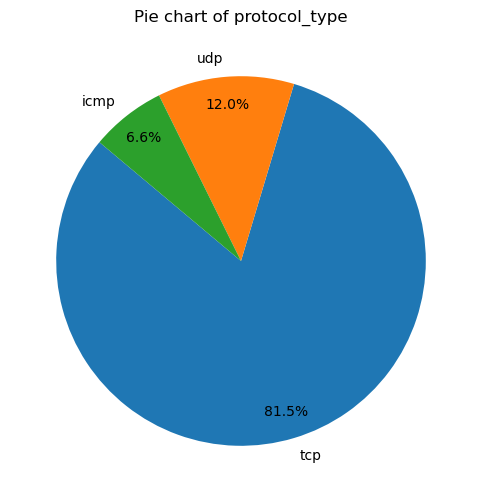

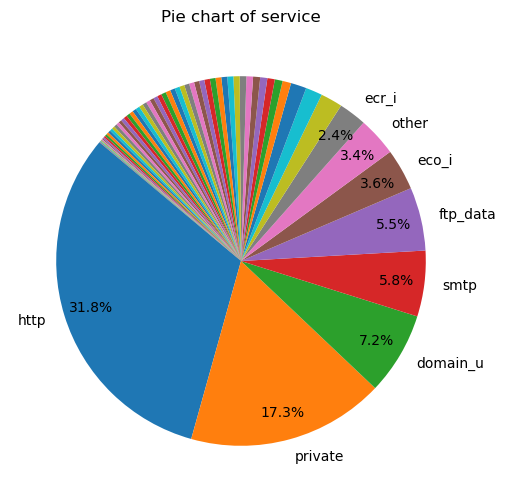

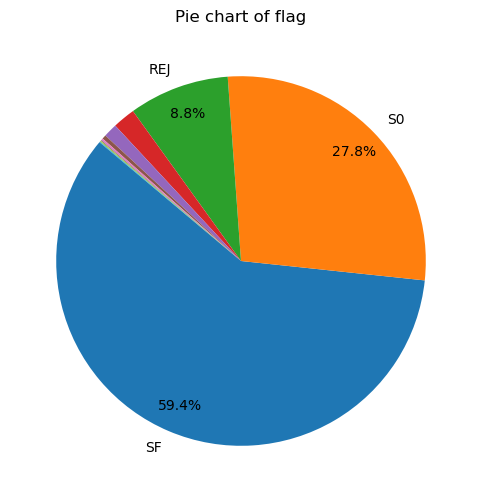

In [ ]:
import matplotlib.pyplot as plt

def plot_pie_charts(data, columns, threshold=0.02):
    for col in columns:
        # Check if the column exists in the DataFrame
        if col in data.columns:
            # Calculate the value counts for the column
            values = data[col].value_counts()
            total = values.sum()

            # Define labels to only include those above the threshold
            labels = [f'{label}' if (count / total) >= threshold else '' for label, count in zip(values.index, values)]

            # Plot the pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(values, labels=labels, autopct=lambda p: f'{p:.1f}%' if p >= (threshold * 100) else '',
                    startangle=140, labeldistance=1.1, pctdistance=0.85)
            plt.title(f'Pie chart of {col}')
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")

# Example usage:
plot_pie_charts(data, categorical_cols, threshold=0.02)  # threshold set to 1%


In [ ]:
service_counts = data['service'].value_counts()
print(service_counts)

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64


**SIMILAR GROUPING OF service COLUMN**

**Web Services:** http, http_443, http_8001, ftp, ftp_data

**Mail Services:** smtp, pop_3, pop_2, imap4

**Remote Access:** telnet, ssh, rlogin, kshell, klogin

**Network Management:** ntp_u, time, daytime, netbios_ns, netbios_ssn, netbios_dgm

**File Transfer:** ftp, ftp_data, tftp_u, pm_dump, red_i

**System Services:** exec, shell, sql_net, printer, login

**Others:** Services not fitting into the main categories can be grouped under Other

In [ ]:
service_groups = {
    'http': 'Web Services', 'http_443': 'Web Services', 'http_8001': 'Web Services',
    'ftp': 'Web Services', 'ftp_data': 'Web Services',
    'smtp': 'Mail Services', 'pop_3': 'Mail Services', 'pop_2': 'Mail Services', 'imap4': 'Mail Services',
    'telnet': 'Remote Access', 'ssh': 'Remote Access', 'rlogin': 'Remote Access', 'kshell': 'Remote Access', 'klogin': 'Remote Access',
    'ntp_u': 'Network Management', 'time': 'Network Management', 'daytime': 'Network Management',
    'netbios_ns': 'Network Management', 'netbios_ssn': 'Network Management', 'netbios_dgm': 'Network Management',
    'ftp_data': 'File Transfer', 'pm_dump': 'File Transfer', 'red_i': 'File Transfer',
    'exec': 'System Services', 'shell': 'System Services', 'sql_net': 'System Services',
    'printer': 'System Services', 'login': 'System Services',
}
data['service'] = data['service'].map(service_groups).fillna('Other')

In [ ]:
#FEATURE ENGINEERING
data['src_dst_ratio'] = data.apply(lambda row: row['src_bytes'] / row['dst_bytes'] if row['dst_bytes'] != 0 else 0, axis=1)
data.drop(columns=['src_bytes','dst_bytes'],inplace=True,axis=1)

data['high_risk_login'] = data.apply(lambda row: 1 if row['num_failed_logins'] > 0 else 0, axis=1)
data.drop(columns=['num_failed_logins'],inplace=True,axis=1)

In [ ]:
data.head()

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,src_dst_ratio,high_risk_login,labels
0,0,1,0,9,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,0,0.000000,0,normal
1,0,2,3,9,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,0.000000,0,normal
2,0,1,3,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0.000000,0,anomaly
3,0,1,6,9,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,0,0.028456,0,normal
4,0,1,6,9,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.473810,0,normal


In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'land',
       'wrong_fragment', 'urgent', 'hot', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'src_dst_ratio',
       'high_risk_login'],
      dtype='object')

In [34]:
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

data.drop_duplicates(inplace=True)

X = data.drop(['class'], axis=1)
y = data['class'].apply(lambda x: 1 if x == 'anomaly' else 0)



Number of duplicate rows: 0


In [35]:
data.head()

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,src_dst_ratio,high_risk_login,labels
0,0,1,0,9,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,0,0.000000,0,normal
1,0,2,3,9,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,0.000000,0,normal
2,0,1,3,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0.000000,0,anomaly
3,0,1,6,9,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,0,0.028456,0,normal
4,0,1,6,9,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.473810,0,normal


In [16]:
print("Duplicates Deleted")

Duplicates Deleted


In [17]:
data['class'].value_counts()

class
normal     13418
anomaly    11520
Name: count, dtype: int64

Correlation of each feature with the target variable (sorted by absolute values):


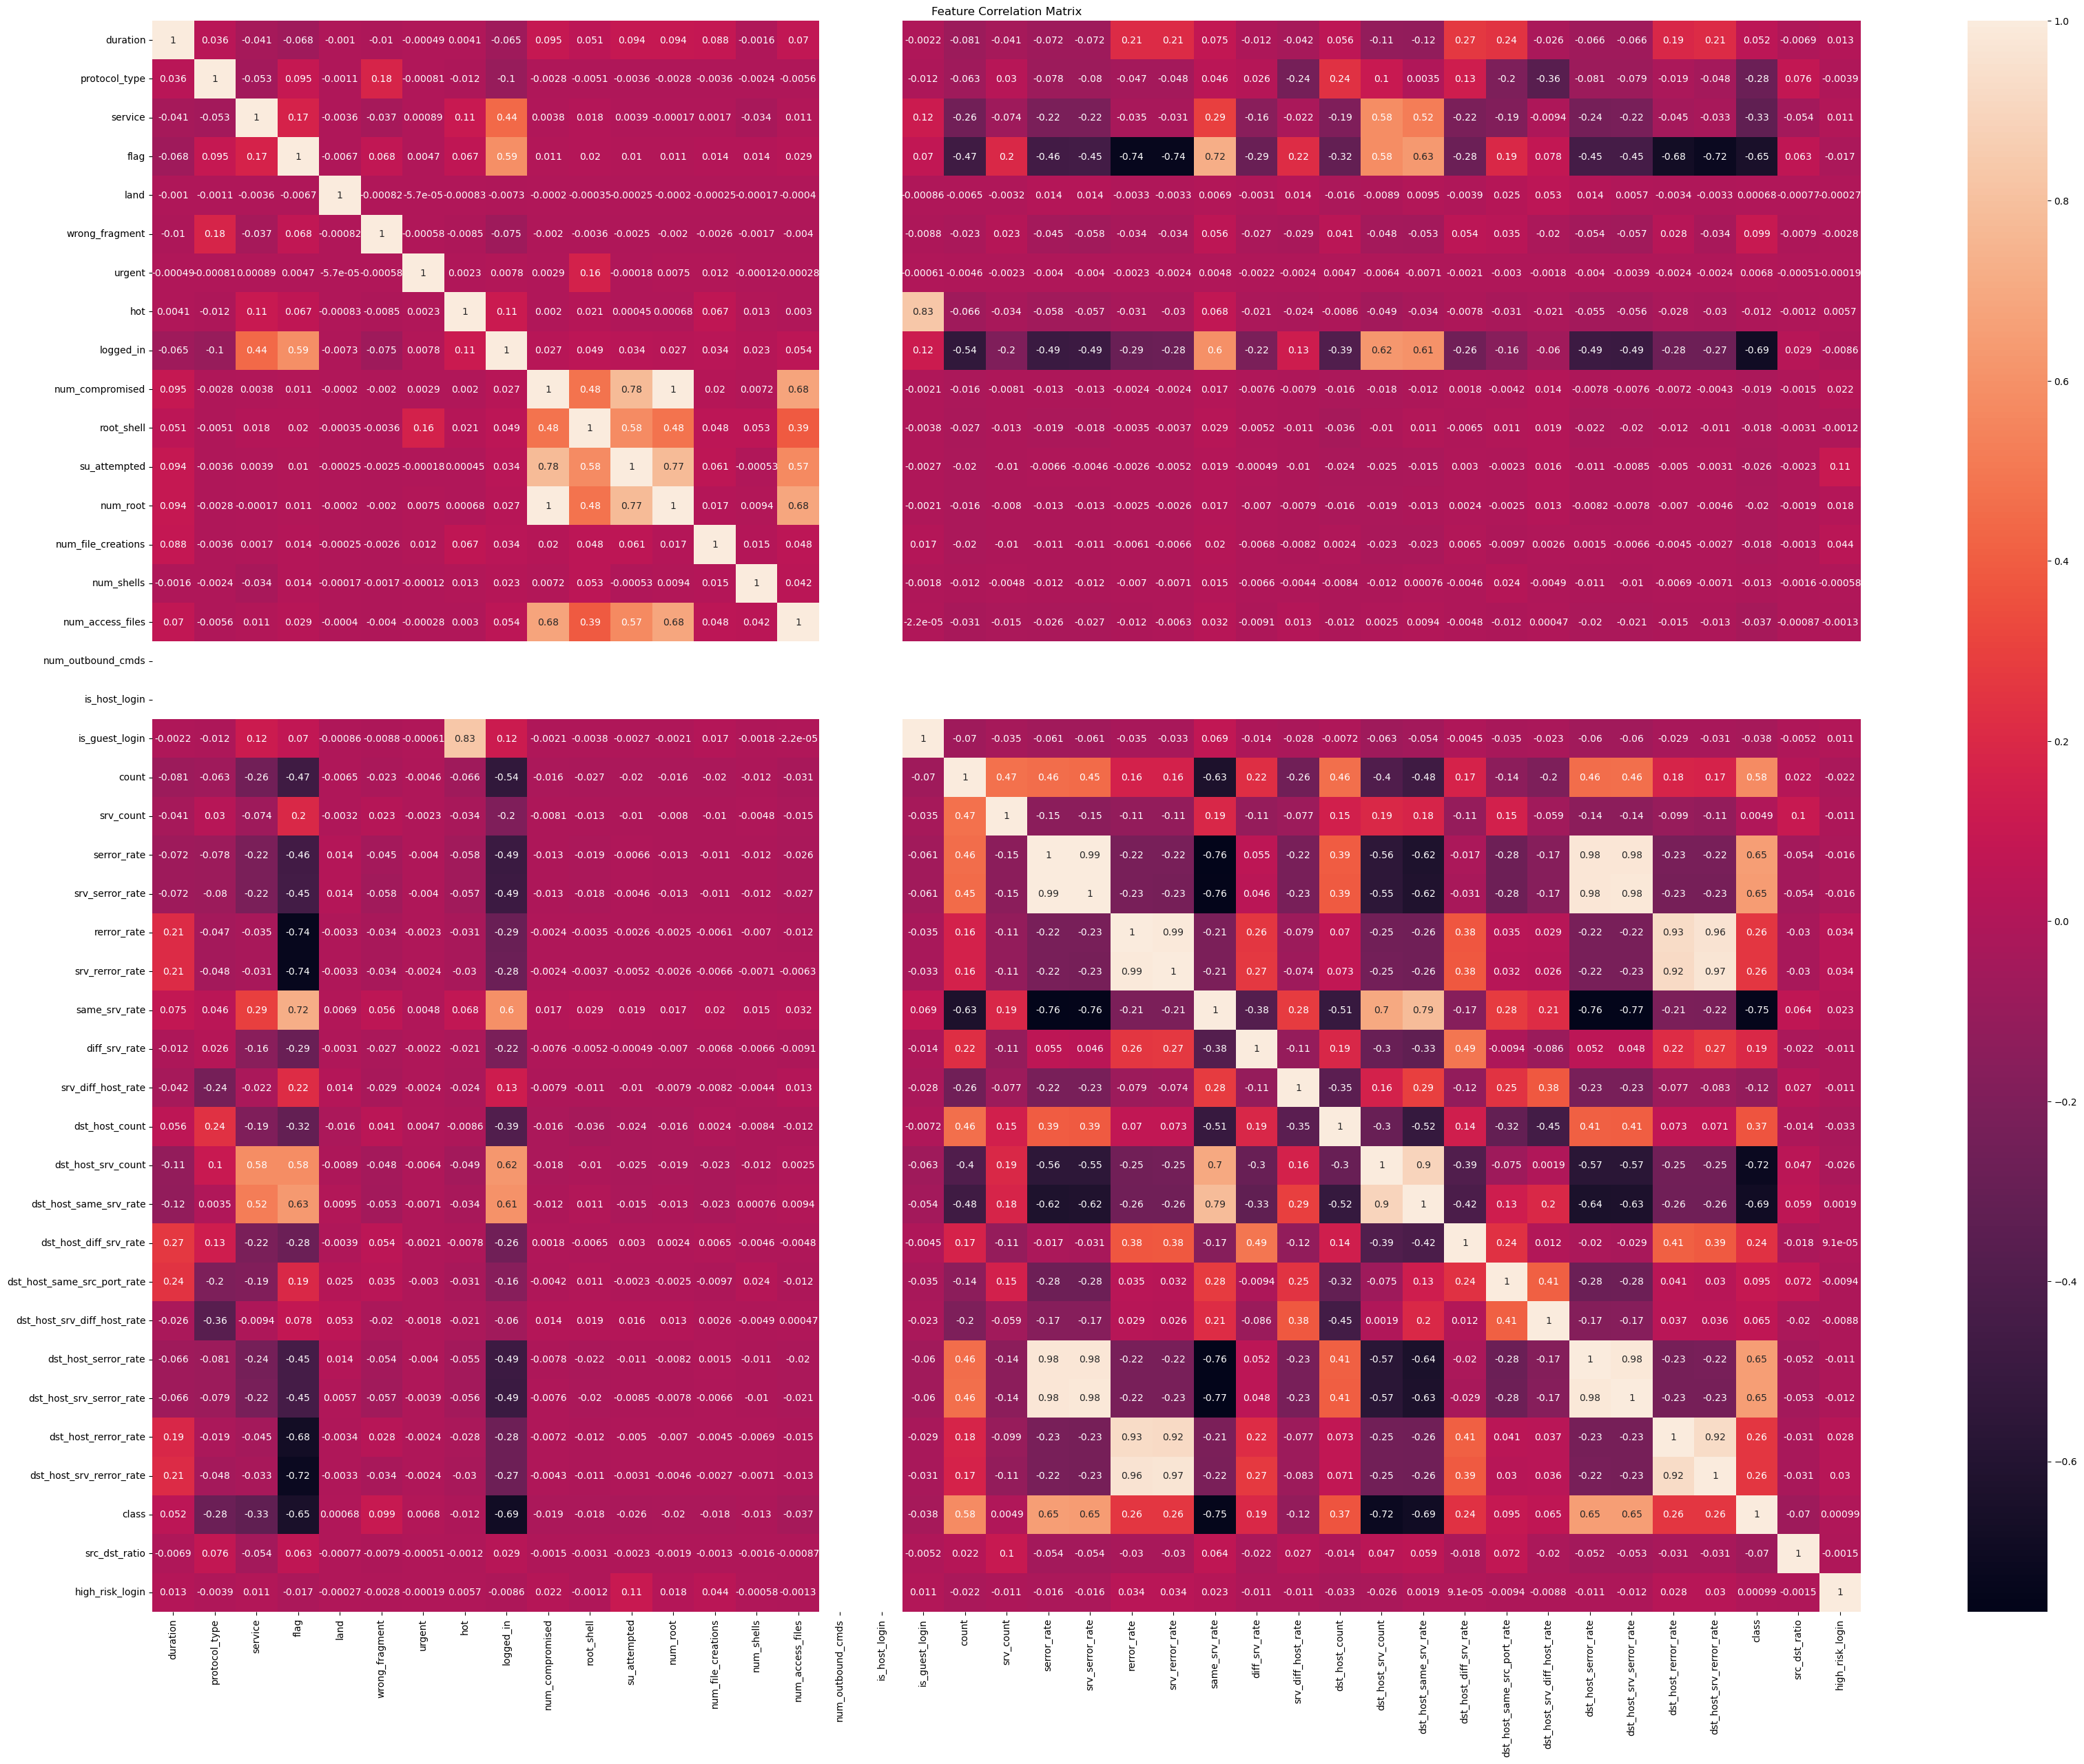

In [18]:
data['class'] = y
correlation_matrix = data.corr()

correlation_with_target = correlation_matrix['class'].sort_values(key=abs, ascending=False)
print("Correlation of each feature with the target variable (sorted by absolute values):")
plt.figure(figsize=(40,30))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

**3. Exploratory Data Analysis (EDA)**

In [19]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'land',
       'wrong_fragment', 'urgent', 'hot', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'src_dst_ratio',
       'high_risk_login'],
      dtype='object')

In [20]:
print(data['is_host_login'].value_counts())
print(data['num_outbound_cmds'].value_counts())

is_host_login
0    24938
Name: count, dtype: int64
num_outbound_cmds
0    24938
Name: count, dtype: int64


In [21]:
data.drop(['is_host_login','num_outbound_cmds'],axis=1,inplace=True)

In [22]:
labels ={0:'normal',1:'anomaly'}
labels

{0: 'normal', 1: 'anomaly'}

In [23]:
data['labels'] = data['class'].map(labels)
data[['class','labels']].head()


,class,labels
0,0,normal
1,0,normal
2,1,anomaly
3,0,normal
4,0,normal


In [24]:
num_features = data.select_dtypes(include = ['int64','float64'])

<Axes: >

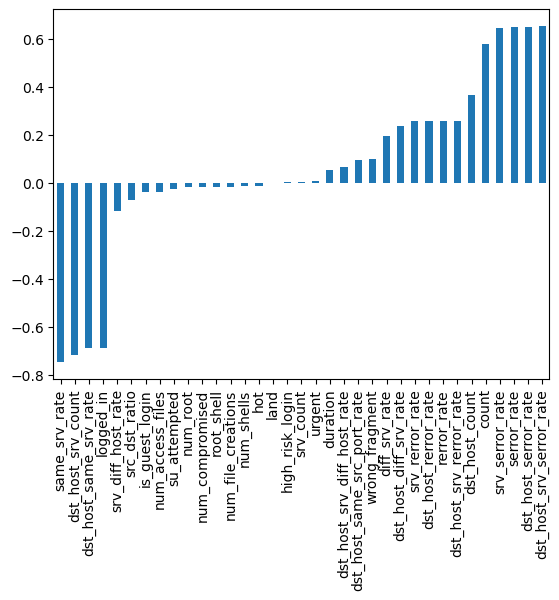

In [25]:
num_features.corr()['class'].sort_values()
num_features.corr()['class'].drop('class').sort_values().plot(kind ='bar')


In [26]:
# data['labels'] = y
# correlation_matrix = data.corr()
# X = data.drop(['labels'], axis=1)

# top_correlations = correlation_with_target[1:16]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=abs(top_correlations.values), y=top_correlations.index, palette='Blues')
# plt.title('Top Features Contributing to Anomalies (Sorted by Absolute Correlation)')
# plt.xlabel('Absolute Correlation with Target (Anomaly)')
# plt.ylabel('Features')
# plt.grid(axis='x')
# plt.show()

# print("Top Correlations (sorted by absolute value):\n", top_correlations)


In [27]:
# top_features = correlation_with_target.index[1:6].tolist()
# print("Top 5 features for scatter plot matrix:")
# print(top_features)

# sns.pairplot(data[top_features + ['labels']], hue='labels', markers=["o", "s"], palette="husl")  # Include the target variable for coloring
# plt.title('Scatter Plot Matrix for Top 5 Features')
# plt.show()

**4. Predictive Modeling**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(probability=True)
lr= LogisticRegression()
svm.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

LogisticRegression()

**5. Model Evaluation and Optimization**

In [29]:
def evaluation(model):
  y_pred= model.predict(X_test_scaled)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(7, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  y_score = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(7, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4043
           1       0.99      0.99      0.99      3439

    accuracy                           0.99      7482
   macro avg       0.99      0.99      0.99      7482
weighted avg       0.99      0.99      0.99      7482

Confusion Matrix:
[[4005   38]
 [  43 3396]]


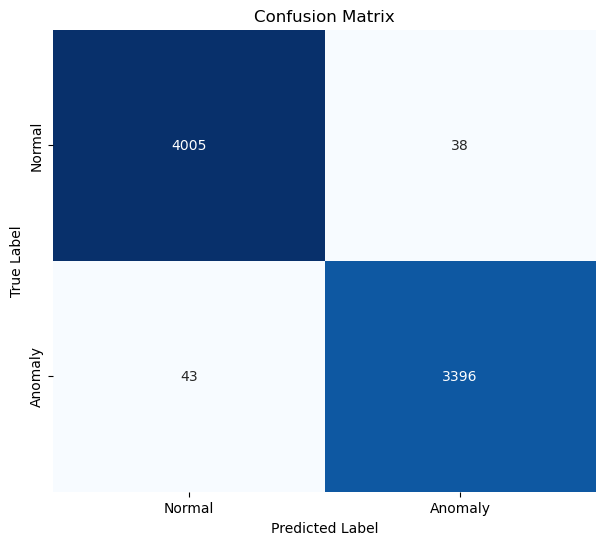

c:\Users\Linghesh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


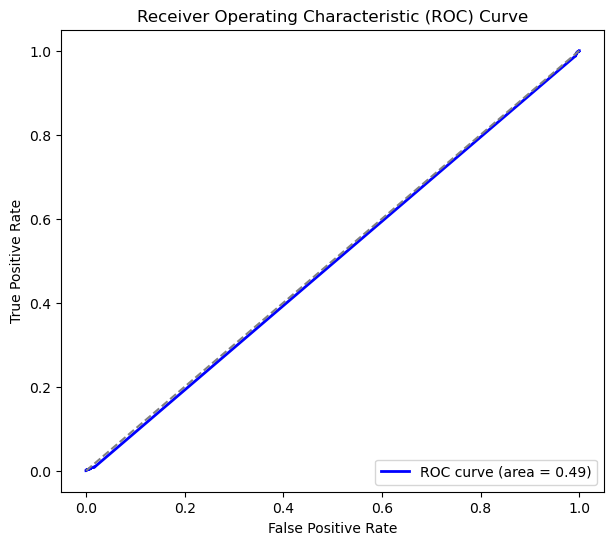

In [30]:
evaluation(svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4043
           1       0.96      0.94      0.95      3439

    accuracy                           0.96      7482
   macro avg       0.96      0.95      0.96      7482
weighted avg       0.96      0.96      0.96      7482

Confusion Matrix:
[[3903  140]
 [ 193 3246]]


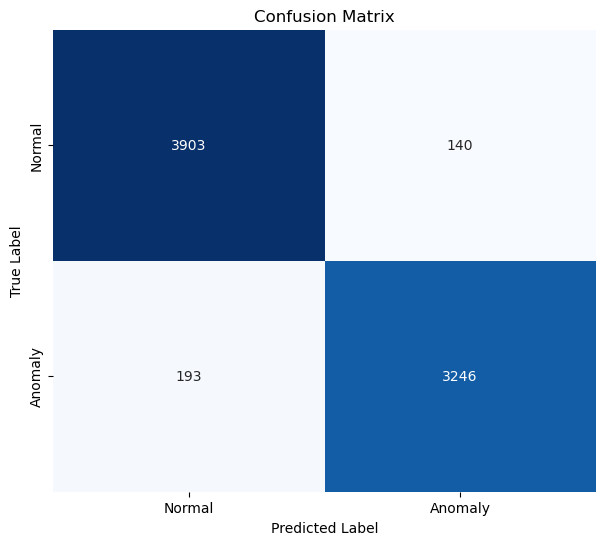

c:\Users\Linghesh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


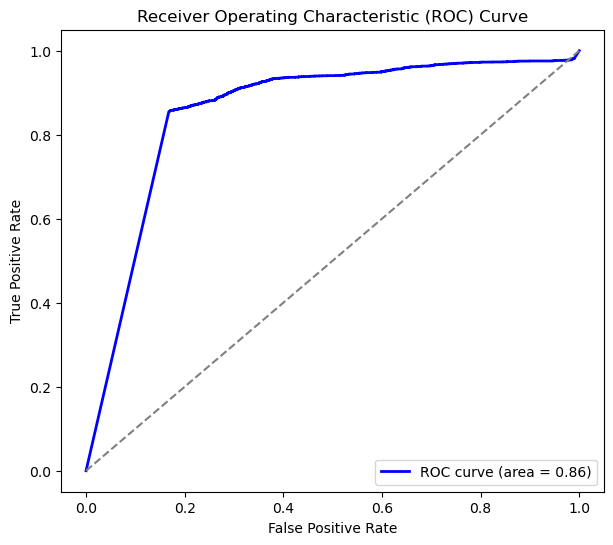

In [31]:
evaluation(lr)